<a href="https://colab.research.google.com/github/YangchenHuang/Algorithmic_Trading/blob/master/Assignments/Yangchen_Huang_HW2_(IEOR_E4650_Spring_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IEOR 4650  Business Analytics (Spring 2020)**

**Homework 2 [Total points: 60]**

**Due: 11:59 PM, Feb 26**

Homework 2 consists of Python programming practices and the applications to 
* Linear regression. 
* Model selection 

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)

In [0]:
#This imports all the packages you need for the homework
#Please run this first


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#import modules

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


##Setting
In this exercise, let's continue working with a dataset that explores the store sales.

Before doing the assignment, please study this dataset [here](https://www.kaggle.com/c/rossmann-store-sales/data)


For this study, we are interested in finding a good model that gives good prediction performance. 

* Especially, we use RMSPE as our accuracy measurement. RMSPE is defined as following:
$$RMSPE = \sqrt{\frac{1}{{N}}{(\frac{y_i-\widehat{y_i}}{y_i})^2}}$$
* In addition, any day and store with 0 actual sales is ignored in scoring.

In [3]:
#Load the dataset
link="https://drive.google.com/open?id=1Q6J0q4tlWJ7TajX6hMSvZ8tK3CyDD8QY"
_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Sales.csv')  
SALE = pd.read_csv('Sales.csv')
SALE.head(5)



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


*You might see a warning when importing the data. This is because StateHoliday has both values in string and numbers. No worries this for now.*

In [4]:
link="https://drive.google.com/open?id=1g6URzUJnhCLOtg0a9TTHC18KYcqwxvoc"
_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('myfile_store.csv')  
STORE = pd.read_csv('myfile_store.csv')
STORE.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## Q1 [7 points]

1. Merge two tables based on "Store" column

2. Select only the first 100 stores for this study

3. This study only cares about the accuracy performed on the data with Sales higher than 0. **Delete all the sales records with sales=0**.

4. Print out the unique values you have in "StateHoliday" column. If you see anything that goes wrong, fix the issue. After that, print out the unique values again in "StateHoliday" column. [You might find this [link](https://www.geeksforgeeks.org/python-pandas-series-str-replace-to-replace-text-in-a-series/) useful]


In [70]:
# Merge two tables based on "Store" column
Study=pd.merge(SALE, STORE, on="Store")
Study

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [71]:
# Select only the first 100 stores for this study
Study=Study[Study["Store"]<=100]
Study

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91251,100,6,2013-01-05,7973,681,1,0,0,0,d,a,17930.0,NaN,NaN,0,NaN,NaN,NaN
91252,100,5,2013-01-04,7129,620,1,0,0,1,d,a,17930.0,NaN,NaN,0,NaN,NaN,NaN
91253,100,4,2013-01-03,7398,672,1,0,0,1,d,a,17930.0,NaN,NaN,0,NaN,NaN,NaN
91254,100,3,2013-01-02,6969,687,1,0,0,1,d,a,17930.0,NaN,NaN,0,NaN,NaN,NaN


In [72]:
# Delete all the sales records with sales=0.
Study=Study[Study["Sales"]!=0]
Study

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91249,100,1,2013-01-07,10609,823,1,1,0,0,d,a,17930.0,NaN,NaN,0,NaN,NaN,NaN
91251,100,6,2013-01-05,7973,681,1,0,0,0,d,a,17930.0,NaN,NaN,0,NaN,NaN,NaN
91252,100,5,2013-01-04,7129,620,1,0,0,1,d,a,17930.0,NaN,NaN,0,NaN,NaN,NaN
91253,100,4,2013-01-03,7398,672,1,0,0,1,d,a,17930.0,NaN,NaN,0,NaN,NaN,NaN


In [73]:
# Print out the unique values you have in "StateHoliday" column. If you see anything that goes wrong, fix the issue. After that, print out the unique values again in "StateHoliday" column.
Study["StateHoliday"].unique()

array(['0', 0, 'a', 'b', 'c'], dtype=object)

In [74]:
Study["StateHoliday"]=Study["StateHoliday"].replace(0, "0")
Study["StateHoliday"].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['0', 'a', 'b', 'c'], dtype=object)

## Q2 [3 points]


Split our data into three segments. Instead of a random split, we will split our data based on the time window:

(1) Training: Time window 2013-01-01 to 2015-03-31  

(2) Validation: Time window 2015-04-01 to 2015-05-31 

(3) Testing: Time window 2015-06-01 to 2015-07-31

Print out how many records you have for each set.

In [75]:
#You might find the following sample code helpful 
#X=X.astype({"Date":"datetime64"})
#X["Date"]<"2015-01-02"
Study=Study.astype({"Date":"datetime64"})
Train=Study[(Study["Date"]>="2013-01-01") & (Study["Date"]<="2015-03-31")]
Validation=Study[(Study["Date"]>="2015-04-01") & (Study["Date"]<="2015-05-31")]
Test=Study[(Study["Date"]>="2015-06-01") & (Study["Date"]<="2015-07-31")]
print(Train.shape[0], Validation.shape[0], Test.shape[0])

65631 4715 5245


##Q3 [8 points]

Now, it is time to practice some model selection techniques. Let's suppose that we want to consider the following model as the most complicated functional form.

$log(Sales) \sim Promo+Promo2+SchoolHoliday+Promo:SchoolHoliday+Promo2:SchoolHoliday$

Here, ":" indicates an interaction term.

Based on cross-validation, choose the best model using **backward stepwise model selection starting from the full model listed above**. 
* Report RMSPE of each model and the variable to be dropped in each round of model selection
[You can do this manually]

* After selecting the final model, report the RMSPE on the test set.

In [76]:
import statsmodels.api as sm
def RM(Prediction, Actual):
    return (np.mean(((Prediction-Actual)/Actual)**2))**0.5
Train=Train.assign(P_S=Train["Promo"] * Train["SchoolHoliday"], P2_S=Train["Promo2"] * Train["SchoolHoliday"])
Validation=Validation.assign(P_S=Validation["Promo"] * Validation["SchoolHoliday"], P2_S=Validation["Promo2"] * Validation["SchoolHoliday"])
Test=Test.assign(P_S=Test["Promo"] * Test["SchoolHoliday"], P2_S=Test["Promo2"] * Test["SchoolHoliday"])
model=sm.OLS(np.log(Train["Sales"]), Train[["Promo", "Promo2", "SchoolHoliday", "P_S", "P2_S"]]).fit()
RMSPE=RM(np.exp(model.predict(Validation[["Promo", "Promo2", "SchoolHoliday", "P_S", "P2_S"]])), Validation["Sales"])
print("Whole model RMSPE", RMSPE)
def stepwise_selection(Train, Validation, y, initial_list, RMSPE):
    included = initial_list
    while True:
        changed=False
        r_list=pd.Series(index=included)
        for column in initial_list:
            features=included.copy()
            features.remove(column)
            model=sm.OLS(y, Train[features]).fit()
            r_list[column]=RM(np.exp(model.predict(Validation[features])), Validation["Sales"])
        print(r_list)
        best_rmspe=r_list.min()
        if best_rmspe < RMSPE:
            changed=True
            RMSPE=best_rmspe
            worst_feature = r_list.argmin()
            included.remove(worst_feature)
            print('Drop {:30} with improved RMSPE {:.6}'.format(worst_feature, RMSPE))
        if not changed:
            break
    return included
features=stepwise_selection(Train, Validation, np.log(Train["Sales"]), ["Promo", "Promo2", "SchoolHoliday", "P_S", "P2_S"], RMSPE)

Whole model RMSPE 8.709088990977902
Promo            0.690918
Promo2           0.697234
SchoolHoliday    9.244848
P_S              6.042097
P2_S             7.154208
dtype: float64
Drop Promo                          with improved RMSPE 0.690918
Promo2            0.917029
SchoolHoliday     3.177475
P_S               0.695214
P2_S             13.502021
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


In [77]:
model=sm.OLS(np.log(Train["Sales"]), Train[features]).fit()
RM(np.exp(model.predict(Test[features])), Test["Sales"])

0.6775587672347368

##Q4 [10 points]


For this question, let's consider a more complicated model  

$np.log(Sales)\sim C(DayOfWeek)+C(SchoolHoliday)+C(StateHoliday)+C(MonthOfYear)+C(Promo)+C(Promo2)+Days$

Here, 
* C() indicating we will treat the variable as a categorical/dummy variable. 
* Days indicates the number of days since the first observation in the dataset (2013-01-01). For example, if the observation date is 2013-01-02, Days should be 1.

Once we specify "Date" as the datetime type. We can easily extract the month information. See the link [here](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties)

* On the training set, estimate this model using OLS

* Report how many independent variables are statistically significant

* Report the RMSPE on the validation set. 





In [78]:
basedate = pd.Timestamp('2013-01-01')
Train=Train.assign(Days=(Train["Date"]-basedate).dt.days)
Train=Train.assign(MonthOfYear=Train["Date"].dt.month)
model=ols("np.log(Sales)~C(DayOfWeek)+C(SchoolHoliday)+C(StateHoliday)+C(MonthOfYear)+C(Promo)+C(Promo2)+Days", Train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     1087.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:22:09   Log-Likelihood:                -19717.
No. Observations:               65631   AIC:                         3.948e+04
Df Residuals:                   65606   BIC:                         3.971e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.63

**Report how many independent variables are statistically significant**

Under 95% significance level, 18 variables are statistically significant

In [79]:
# Report the RMSPE on the validation set.
Validation=Validation.assign(Days=(Validation["Date"]-basedate).dt.days)
Validation=Validation.assign(MonthOfYear=Validation["Date"].dt.month)
RM(np.exp(model.predict(Validation)), Validation["Sales"])

0.35184222048237723

##Q5 [14 points]

* Add L1 penalty term to the regression in Q4. Plot the relationship between $\alpha$ and the number of independent variables kept (the number of independent variables with $\hat{\beta}$ not equal to 0). 

* Plot the relationship between $\alpha$ and RMSPE on the Validation set. 

* Report the best $\alpha$ value and the corresponding RMSPE on the validation set.

* Report which variables are kept for the best model

[Remember to demean the y-value. Also, remember to standardize the x variables using StandardScaler]





In [0]:
basedate = pd.Timestamp('2013-01-01')
Study=Study.assign(Days=(Study["Date"]-basedate).dt.days)
Study=Study.assign(MonthOfYear=Study["Date"].dt.month)
Dummy_variables1=pd.get_dummies(Study["DayOfWeek"], prefix="D", prefix_sep='',drop_first=True)
Dummy_variables2=pd.get_dummies(Study["MonthOfYear"], prefix="M", prefix_sep='',drop_first=True)
Dummy_variables3=pd.get_dummies(Study["StateHoliday"], prefix="St", prefix_sep='',drop_first=True)
Study=pd.concat([Study,Dummy_variables1,Dummy_variables2,Dummy_variables3], axis=1)
Train=Study[(Study["Date"]>="2013-01-01") & (Study["Date"]<="2015-03-31")]
Validation=Study[(Study["Date"]>="2015-04-01") & (Study["Date"]<="2015-05-31")]
Test=Study[(Study["Date"]>="2015-06-01") & (Study["Date"]<="2015-07-31")]     

In [0]:
Train_X=Train[["D2","D3","D4","D5","D6","D7","M2","M3","M4","M5","M6","M7","M8","M9","M10","M11","M12","Sta","Stb","Stc","SchoolHoliday","Promo","Promo2","Days"]]
Train_y=np.log(Train["Sales"])
Valid_X=Validation[["D2","D3","D4","D5","D6","D7","M2","M3","M4","M5","M6","M7","M8","M9","M10","M11","M12","Sta","Stb","Stc","SchoolHoliday","Promo","Promo2","Days"]]
Valid_y=Validation["Sales"]        
Test_X=Test[["D2","D3","D4","D5","D6","D7","M2","M3","M4","M5","M6","M7","M8","M9","M10","M11","M12","Sta","Stb","Stc","SchoolHoliday","Promo","Promo2","Days"]]
Test_y=Test["Sales"]  

best alpha 0.01
best RMSPE 0.3410017159820713
best coefficient [-0.00484007 -0.01944085 -0.01669039 -0.         -0.02451209  0.01965205
 -0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.          0.00378544  0.04974373  0.
  0.          0.          0.          0.16626712 -0.00278296  0.00749286]
D2
D3
D4
D6
D7
M11
M12
Promo
Promo2
Days


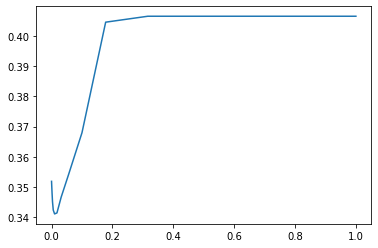

In [118]:
# create an object
modelSS=StandardScaler()
#fit the model
modelSS.fit(Train_X)
#standardization 
Train_X=modelSS.transform(Train_X)
Valid_X=modelSS.transform(Valid_X)
RM_list=[]
coeff_list=[]
for i in np.logspace(-5,0,num=21,base=10):
    Lasso_model=Lasso(alpha=i,fit_intercept=False)
    Lasso_model.fit(Train_X,Train_y-Train_y.mean())
    Prediction=Lasso_model.predict(Valid_X)+Train_y.mean()
    RM_list.append(RM(np.exp(Prediction), Valid_y))
    coeff_list.append(Lasso_model.coef_)
plt.plot(np.logspace(-5,0,num=21,base=10), RM_list)
best_alpha=np.logspace(-5,0,num=21,base=10)[RM_list.index(min(RM_list))]
best_coeff=coeff_list[RM_list.index(min(RM_list))]
print("best alpha", best_alpha)
print("best RMSPE", min(RM_list))
print("best coefficient", best_coeff)
features=["D2","D3","D4","D5","D6","D7","M2","M3","M4","M5","M6","M7","M8","M9","M10","M11","M12","Sta","Stb","Stc","SchoolHoliday","Promo","Promo2","Days"]
for i in range(len(best_coeff)):
    if best_coeff[i]!=0:
        print(features[i])

    

##Q6 [10 points]

* Add L2 penalty term to the regression in Q4. 

* Plot the relationship between $\alpha$ and RMSPE on the validation set. 

* Report the best $\alpha$ value and the corresponding RMSPE on the validation set.

* Report which variables are kept for the best model

* You might find that the $\alpha$ values are on very different scales in Q5 and Q6. Find out why this is the case by doing a little research yourself. [The answer should be pretty straightforward]
 
[Remember to demean the y-value. Also, remember to standardize the x variables using StandardScaler]




best alpha 5179.474679231202
best RMSPE 0.3510590484387944
best coefficient [-3.50830790e-02 -4.81142106e-02 -4.46524911e-02 -2.63465038e-02
 -5.36018195e-02  2.45989603e-02 -2.36970638e-03  6.95992237e-03
  5.79147670e-03  1.18439144e-02  7.68671481e-03  3.06768710e-03
 -5.36875093e-03 -5.34531767e-03 -3.87932320e-03  1.53451149e-02
  5.52618062e-02  4.91422103e-05  4.34287196e-03  1.21498802e-03
  1.15651739e-02  1.59980224e-01 -1.13720049e-02  1.65957756e-02]
D2
D3
D4
D5
D6
D7
M2
M3
M4
M5
M6
M7
M8
M9
M10
M11
M12
Sta
Stb
Stc
SchoolHoliday
Promo
Promo2
Days


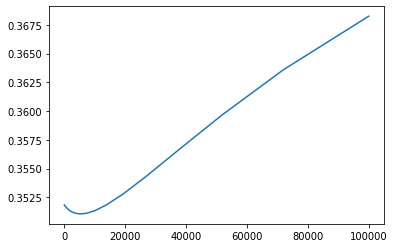

In [119]:
RM_list=[]
coeff_list=[]
for i in np.logspace(-2,5,num=50,base=10):
    Ridge_model=Ridge(alpha=i,fit_intercept=False)
    Ridge_model.fit(Train_X,Train_y-Train_y.mean())
    Prediction=Ridge_model.predict(Valid_X)+Train_y.mean()
    RM_list.append(RM(np.exp(Prediction), Valid_y))
    coeff_list.append(Ridge_model.coef_)
plt.plot(np.logspace(-2,5,num=50,base=10), RM_list)
best_alpha=np.logspace(-2,5,num=50,base=10)[RM_list.index(min(RM_list))]
best_coeff=coeff_list[RM_list.index(min(RM_list))]
print("best alpha", best_alpha)
print("best RMSPE", min(RM_list))
print("best coefficient", best_coeff)
features=["D2","D3","D4","D5","D6","D7","M2","M3","M4","M5","M6","M7","M8","M9","M10","M11","M12","Sta","Stb","Stc","SchoolHoliday","Promo","Promo2","Days"]
for i in range(len(best_coeff)):
    if best_coeff[i]!=0:
        print(features[i])

**You might find that the  α  values are on very different scales in Q5 and Q6. Find out why this is the case by doing a little research yourself.**

This is because the difference in these two functions. LASSO model use the total squared error in its objective function while Ridge model use the mean squared error in its objective function. That's why there's a significant scale difference between these two optimal alphas. 

##Q7 [8 points]

* Use ElasticNet with $L1=0.25, 0.5, 0.75$. Discuss if you can further improve the model performance.

* Report the RMSPE on the testing set based on the best model chosen.

[Remember to demean the y-value. Also, remember to standardize the x variables using StandardScaler]





best alpha, L1 ratio and corresponding RMSPE [0.01778279 0.5        0.3409457 ]


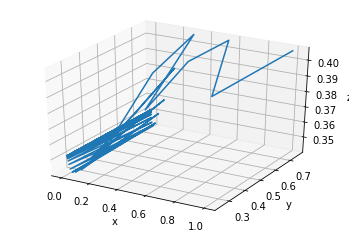

In [148]:
RM_list=[]
coeff_list=[]
for i in np.logspace(-5,0,num=21,base=10):
    for j in [0.25, 0.5, 0.75]:
        ElasticNet_model=ElasticNet(alpha=i, l1_ratio=j, fit_intercept=False)
        ElasticNet_model.fit(Train_X,Train_y-Train_y.mean())
        Prediction=ElasticNet_model.predict(Valid_X)+Train_y.mean()
        RM_list.append([i, j, RM(np.exp(Prediction), Valid_y)])
        coeff_list.append(ElasticNet_model.coef_)
RM_list=np.array(RM_list)
best_rmspe=min(RM_list[:,2])
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(RM_list[:,0], RM_list[:,1], RM_list[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

print("best alpha, L1 ratio and corresponding RMSPE", RM_list[RM_list[:,2].tolist().index(best_rmspe)])